Importing the Dependencies

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

# ML model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Data Collection and Processing

In [265]:
# loading the dataset to pandas DataFrame
fertilizer_dataset = pd.read_csv('/content/Fertilizer_Prediction.csv')

In [266]:
type(fertilizer_dataset)

pandas.core.frame.DataFrame

In [267]:
# first 5 rows of the dataframe
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [268]:
# last 5 rows of the dataframe
fertilizer_dataset.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
119,25,72,48,Black,Jute,89,41,40,Urea
120,25,72,48,Black,Apple,89,48,150,N-P-K_12-12-1
121,17,89,50,Black,Orange,21,31,15,P2O5
122,25,90,48,Black,Coconut,17,35,30,Granular
123,26,75,55,Black,Jute,96,50,46,Urea


In [269]:
# number of rows and columns
fertilizer_dataset.shape

(124, 9)

In [270]:
# the name of the columns of dataframe
fertilizer_dataset.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [271]:
# Describe the data
fertilizer_dataset.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,29.266129,62.225806,45.879032,29.532258,11.919355,24.451613
std,4.183026,10.057428,11.909273,28.731002,21.357810,24.281330
min,15.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,26.000000,54.000000,35.750000,11.000000,0.000000,12.000000
50%,29.000000,60.000000,45.500000,18.500000,0.000000,21.000000
75%,32.250000,65.250000,56.000000,38.000000,15.250000,34.250000
max,38.000000,92.000000,72.000000,118.000000,128.000000,196.000000


In [272]:
# Describe the data with transpose
fertilizer_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,124.0,29.266129,4.183026,15.0,26.00,29.0,32.25,38.0
Humidity,124.0,62.225806,10.057428,50.0,54.00,60.0,65.25,92.0
Moisture,124.0,45.879032,11.909273,25.0,35.75,45.5,56.00,72.0
Nitrogen,124.0,29.532258,28.731002,4.0,11.00,18.5,38.00,118.0
Potassium,124.0,11.919355,21.357810,0.0,0.00,0.0,15.25,128.0
Phosphorous,124.0,24.451613,24.281330,0.0,12.00,21.0,34.25,196.0


In [273]:
# getting imformation about dataset
fertilizer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      124 non-null    int64 
 1   Humidity         124 non-null    int64 
 2   Moisture         124 non-null    int64 
 3   Soil Type        124 non-null    object
 4   Crop Type        124 non-null    object
 5   Nitrogen         124 non-null    int64 
 6   Potassium        124 non-null    int64 
 7   Phosphorous      124 non-null    int64 
 8   Fertilizer Name  124 non-null    object
dtypes: int64(6), object(3)
memory usage: 8.8+ KB


In [274]:
# number of missing values in each column
fertilizer_dataset.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

No missing values or null values in this dataframe,
For null values we have to replace or mean or median or delete

replacing the null values with mean of single column,
1. fertilizer_dataset['col_name'].fillna(fertilizer_dataset.col_name.mean(), inplace=True)

Data Visualization

Pairplot for Fertilizer Prediction Dataset


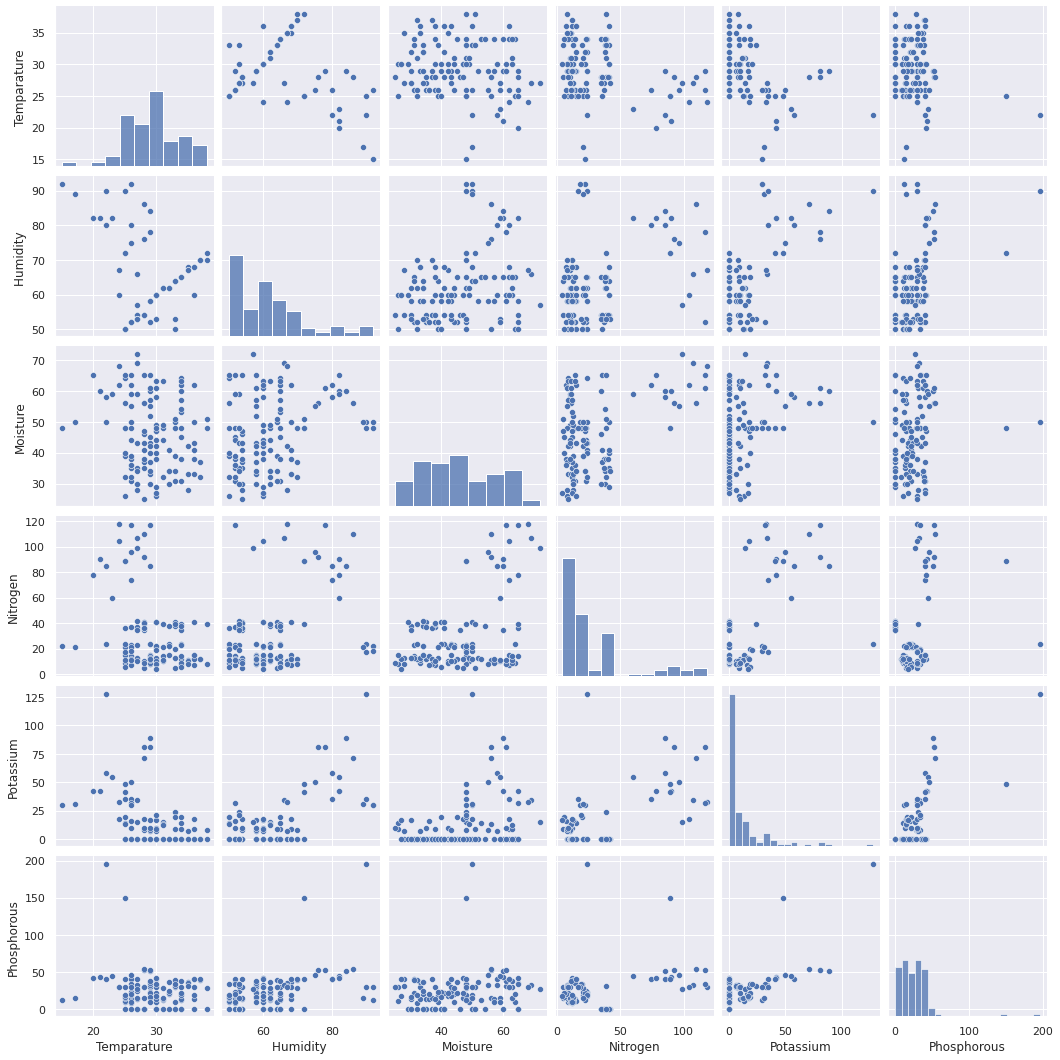

In [275]:
# pairplot for Fertilizer Prediction Dataset
sns.pairplot(fertilizer_dataset)
print('Pairplot for Fertilizer Prediction Dataset')

Histplot in Fertilizer Prediction Dataset


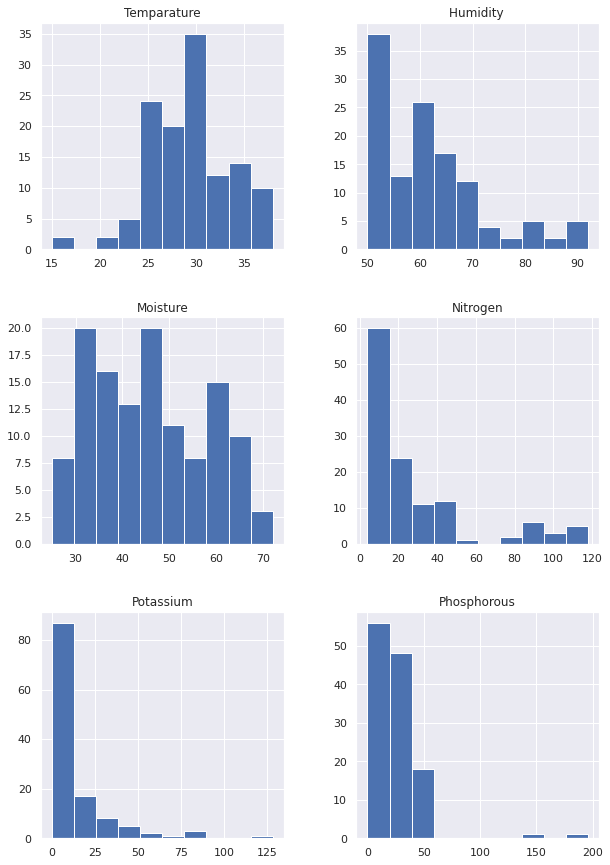

In [276]:
sns.set(style="darkgrid") # hide graph line
fertilizer_dataset.hist(figsize=(10,15))
print('Histplot in Fertilizer Prediction Dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



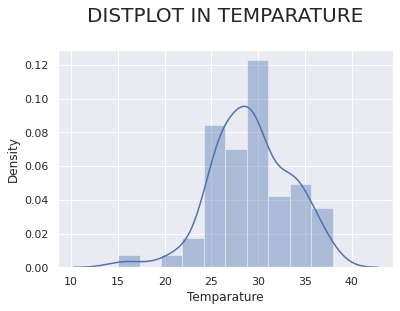

In [277]:
# Temparature
plt.figure(figsize=(6,4))
sns.distplot(fertilizer_dataset['Temparature'])
title = 'Distplot in Temparature\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



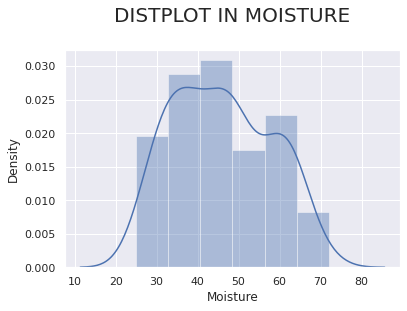

In [278]:
# Moisture
plt.figure(figsize=(6,4))
sns.distplot(fertilizer_dataset['Moisture'])
title = 'Distplot in Moisture\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [279]:
# Soil Type column values
fertilizer_dataset['Soil Type'].value_counts()

Black         39
Loamy         21
Sandy         20
Clayey        20
Red           19
sandy loam     5
Name: Soil Type, dtype: int64

In [280]:
# Crop Type column values
fertilizer_dataset['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Ground Nuts     7
Oil seeds       7
Tobacco         7
Barley          7
Maize           6
Coffee          5
Rice            5
Banana          4
Mango           3
Orange          2
Jute            2
Coconut         2
Apple           2
Name: Crop Type, dtype: int64

Text(0.5, 1.0, 'Temperature vs Humidity of Fertilizer Prediction Dataset')

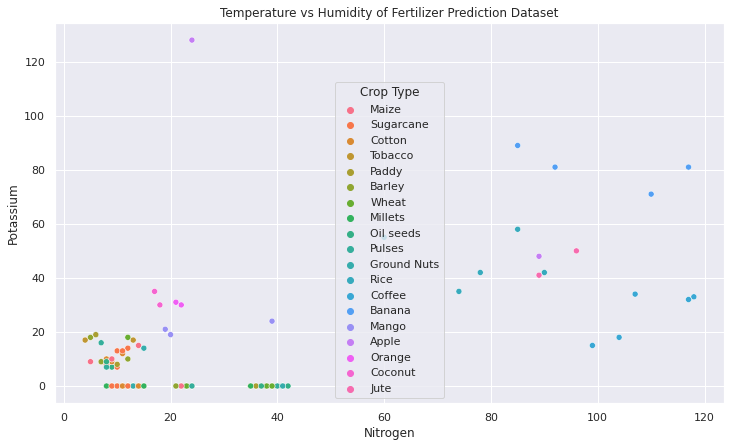

In [281]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='Nitrogen', y='Potassium', data=fertilizer_dataset, hue='Crop Type')
plt.title('Temperature vs Humidity of Fertilizer Prediction Dataset')

Text(0.5, 1.0, 'Temperature vs Humidity of Fertilizer Prediction Dataset')

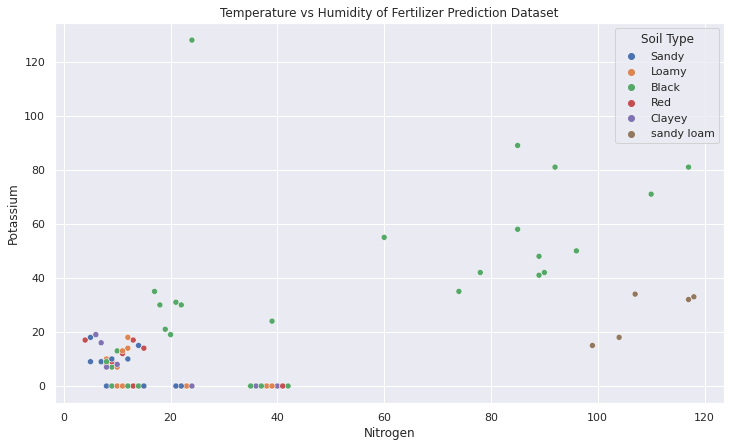

In [282]:
plt.figure(figsize=(12,7))
axis = sns.scatterplot(x='Nitrogen', y='Potassium', data=fertilizer_dataset, hue='Soil Type')
plt.title('Temperature vs Humidity of Fertilizer Prediction Dataset')

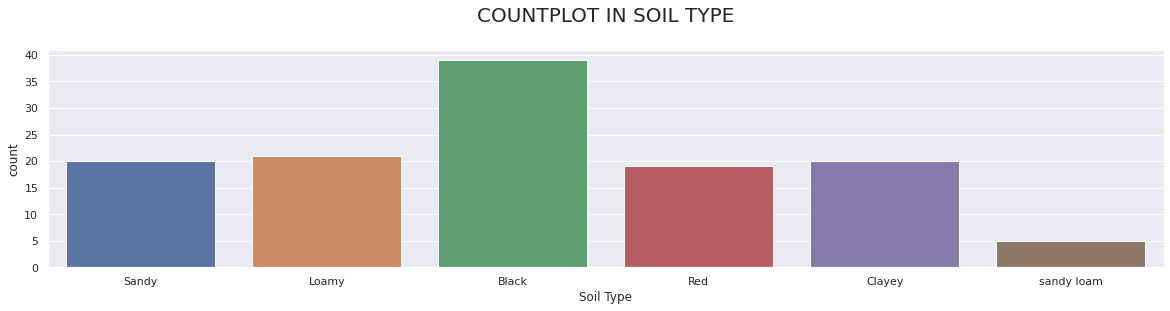

In [283]:
# Soil Type
plt.figure(figsize=(20,4))
sns.countplot(x='Soil Type', data=fertilizer_dataset)
title = 'CountPlot in Soil Type\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

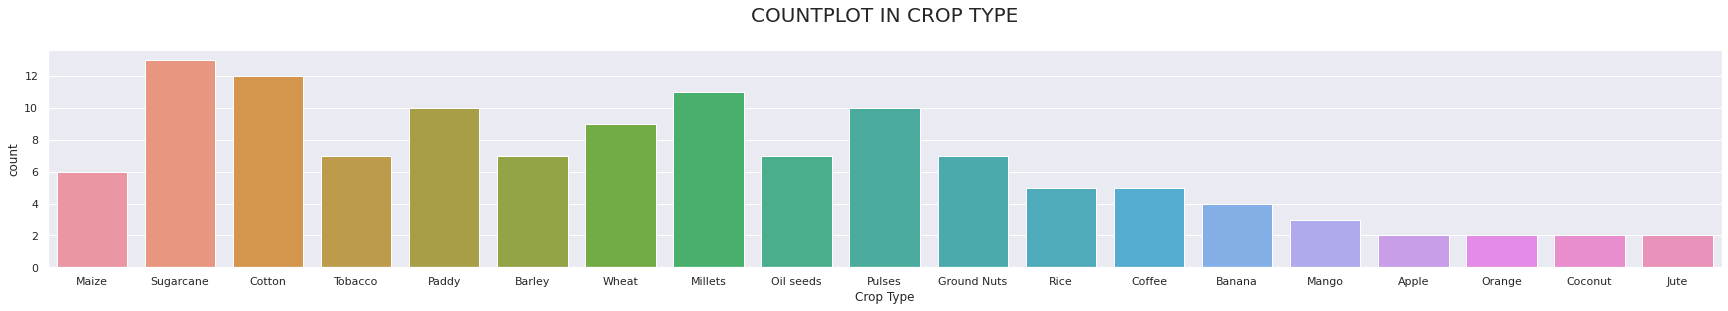

In [284]:
# Crop Type
plt.figure(figsize=(30,4))
sns.countplot(x='Crop Type', data=fertilizer_dataset)
title = 'CountPlot in Crop Type\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

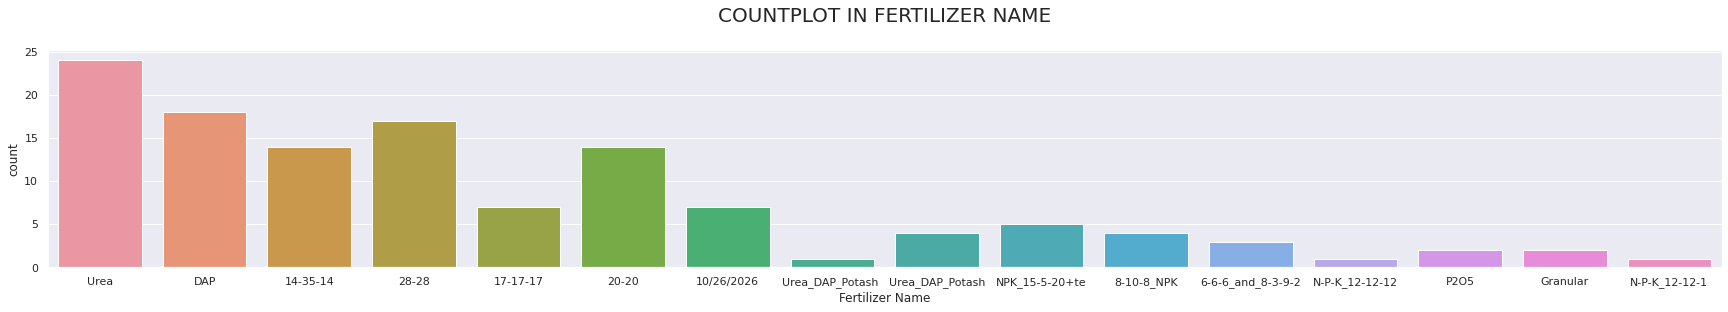

In [285]:
# Fertilizer Name
plt.figure(figsize=(30,4))
sns.countplot(x='Fertilizer Name', data=fertilizer_dataset)
title = 'CountPlot in Fertilizer Name\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

Understanding the correlation between various features in the dataset

In [286]:
correlation = fertilizer_dataset.corr()

In [287]:
print(correlation)

             Temparature  Humidity   Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  -0.083764 -0.164507 -0.336654  -0.400164    -0.162803
Humidity       -0.083764   1.000000  0.281173  0.361715   0.651878     0.428975
Moisture       -0.164507   0.281173  1.000000  0.424199   0.357568     0.175628
Nitrogen       -0.336654   0.361715  0.424199  1.000000   0.584914     0.223361
Potassium      -0.400164   0.651878  0.357568  0.584914   1.000000     0.668041
Phosphorous    -0.162803   0.428975  0.175628  0.223361   0.668041     1.000000


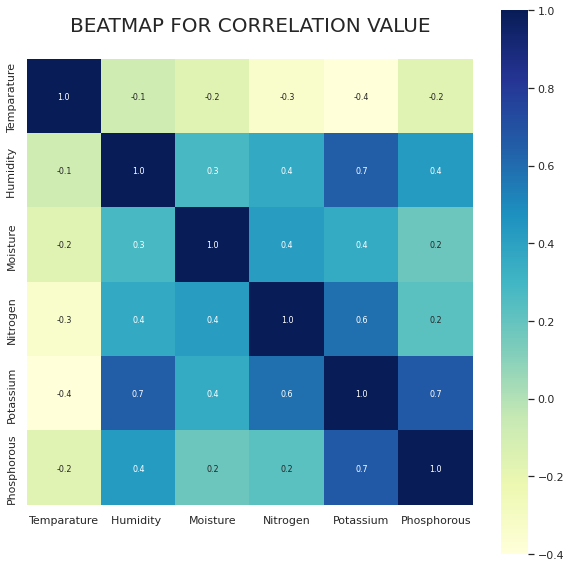

In [288]:
# constructing a beatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='YlGnBu')
title = 'Beatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

List of various crops Fertilizer Name

In [289]:
print("Number of various Fertilizer: ", len(fertilizer_dataset['Fertilizer Name'].unique()))
print("List of Fertilizer Name: ", fertilizer_dataset['Fertilizer Name'].unique())

Number of various Fertilizer:  16
List of Fertilizer Name:  ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10/26/2026'
 'Urea_DAP_Potash ' 'Urea_DAP_Potash' 'NPK_15-5-20+te' '8-10-8_NPK'
 '6-6-6_and_8-3-9-2' 'N-P-K_12-12-12' 'P2O5' 'Granular' 'N-P-K_12-12-1']


In [290]:
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [291]:
# Soil Type column values
fertilizer_dataset['Soil Type'].value_counts()

Black         39
Loamy         21
Sandy         20
Clayey        20
Red           19
sandy loam     5
Name: Soil Type, dtype: int64

Label Encoding

In [292]:
encoder = LabelEncoder()

In [293]:
fertilizer_dataset['Soil Type'] = encoder.fit_transform(fertilizer_dataset['Soil Type'])

In [294]:
# Soil Type column values
fertilizer_dataset['Soil Type'].value_counts()

0    39
2    21
4    20
1    20
3    19
5     5
Name: Soil Type, dtype: int64

replace Soil Type and Crop Type data with values

In [295]:
# Crop Type column values
fertilizer_dataset['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Ground Nuts     7
Oil seeds       7
Tobacco         7
Barley          7
Maize           6
Coffee          5
Rice            5
Banana          4
Mango           3
Orange          2
Jute            2
Coconut         2
Apple           2
Name: Crop Type, dtype: int64

In [296]:
# convert categorical data to numerical values
fertilizer_dataset.replace({'Crop Type': {'Rice': 0, 'Maize': 1, 'Coffee': 2, 'Sugarcane': 3, 'Cotton': 4,
                                     'Millets': 5, 'Paddy': 6, 'Pulses': 7, 'Wheat': 8, 'Barley': 9, 
                                     'Tobacco': 10, 'Oil seeds': 11, 'Ground Nuts': 12, 'Banana': 13 , 'Mango': 14,
                                     'Apple': 15, 'Orange': 16, 'Coconut': 17, 'Jute': 18, 
                                     },}, inplace=True)

In [297]:
# Crop Type column values
fertilizer_dataset['Crop Type'].value_counts()

3     13
4     12
5     11
6     10
7     10
8      9
9      7
12     7
11     7
10     7
1      6
2      5
0      5
13     4
14     3
17     2
15     2
16     2
18     2
Name: Crop Type, dtype: int64

In [298]:
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,1,37,0,0,Urea
1,29,52,45,2,3,12,0,36,DAP
2,34,65,62,0,4,7,9,30,14-35-14
3,32,62,34,3,10,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [299]:
print("Number of various Fertilizer: ", len(fertilizer_dataset['Fertilizer Name'].unique()))
print("List of Fertilizer Name: ", fertilizer_dataset['Fertilizer Name'].unique())

Number of various Fertilizer:  16
List of Fertilizer Name:  ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10/26/2026'
 'Urea_DAP_Potash ' 'Urea_DAP_Potash' 'NPK_15-5-20+te' '8-10-8_NPK'
 '6-6-6_and_8-3-9-2' 'N-P-K_12-12-12' 'P2O5' 'Granular' 'N-P-K_12-12-1']


In [300]:
# convert categorical data to numerical values
fertilizer_dataset.replace({'Fertilizer Name': {'Urea': 0, 'DAP': 1, '14-35-14': 2, '28-28': 3, '17-17-17': 4,
                                                '20-20': 5, '10/26/2026': 6, 'Urea_DAP_Potash ': 7, 
                                                'Urea_DAP_Potash': 8, 'NPK_15-5-20+te': 9, '8-10-8_NPK': 10, 
                                                '6-6-6_and_8-3-9-2': 11, 'N-P-K_12-12-12': 12, 'P2O5': 13, 'Granular': 14,
                                                  'N-P-K_12-12-1': 15},}, inplace=True)

In [301]:
fertilizer_dataset.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,1,37,0,0,0
1,29,52,45,2,3,12,0,36,1
2,34,65,62,0,4,7,9,30,2
3,32,62,34,3,10,22,0,20,3
4,28,54,46,1,6,35,0,0,0


Splitting the data set

In [302]:
X = fertilizer_dataset.drop(['Fertilizer Name'], axis=1)
Y = fertilizer_dataset['Fertilizer Name']

In [303]:
print(X)

     Temparature  Humidity   Moisture  ...  Nitrogen  Potassium  Phosphorous
0             26         52        38  ...        37          0            0
1             29         52        45  ...        12          0           36
2             34         65        62  ...         7          9           30
3             32         62        34  ...        22          0           20
4             28         54        46  ...        35          0            0
..           ...        ...       ...  ...       ...        ...          ...
119           25         72        48  ...        89         41           40
120           25         72        48  ...        89         48          150
121           17         89        50  ...        21         31           15
122           25         90        48  ...        17         35           30
123           26         75        55  ...        96         50           46

[124 rows x 8 columns]


In [304]:
print(Y)

0       0
1       1
2       2
3       3
4       0
       ..
119     0
120    15
121    13
122    14
123     0
Name: Fertilizer Name, Length: 124, dtype: int64


Splitting the data into Training data & Testing Data

In [305]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [306]:
print(X.shape, X_train.shape, X_test.shape)

(124, 8) (86, 8) (38, 8)


Machine Learning Model Training

Random Forest

In [307]:
clf_random_forest=RandomForestClassifier()
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [308]:
random_forest_text_predictions = clf_random_forest.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')
# print('Actual Outcome: \n', Y_test)
# print('\n Predicted Outcome: \n', random_forest_text_predictions)
print(classification_report(Y_test,random_forest_text_predictions))

Accuracy Score :  97.36842105263158 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1

    accuracy                           0.97        38
   macro avg       0.85      0.85      0.85        38
weighted avg       0.97      0.97      0.97        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [333]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_text_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_text_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_text_predictions))))

Mean_absolute_error:  0.02631578947368421
Mean_squared_error:  0.02631578947368421
Root mean_squared_error:  0.16222142113076254


Checking Actual Fertilizer Name and Predicted Fertilizer Name

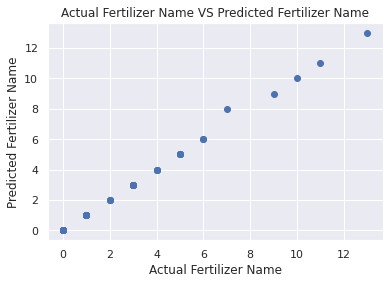

In [323]:
plt.scatter(Y_test, random_forest_text_predictions)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

XGBClassifier

In [309]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [310]:
xgb_pred = xgb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')
print(classification_report(Y_test,xgb_pred))

Accuracy Score :  89.47368421052632 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         6
           4       0.67      0.67      0.67         3
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.89        38
   macro avg       0.71      0.73      0.72        38
weighted avg       0.88      0.89      0.88        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [332]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, xgb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, xgb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred))))

Mean_absolute_error:  0.3157894736842105
Mean_squared_error:  2.210526315789474
Root mean_squared_error:  1.4867838833500564


Checking Actual Fertilizer Name and Predicted Fertilizer Name

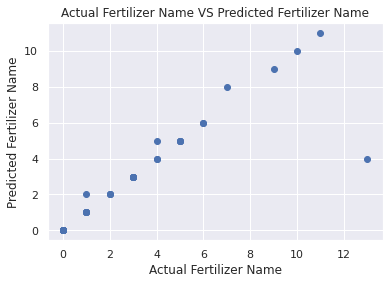

In [324]:
plt.scatter(Y_test, xgb_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

LogisticRegression

In [311]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [312]:
log_reg_pred = log_reg.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,log_reg_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')
print(classification_report(Y_test,log_reg_pred))

Accuracy Score :  97.36842105263158 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1

    accuracy                           0.97        38
   macro avg       0.85      0.85      0.85        38
weighted avg       0.97      0.97      0.97        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [331]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, log_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, log_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, log_reg_pred))))

Mean_absolute_error:  0.02631578947368421
Mean_squared_error:  0.02631578947368421
Root mean_squared_error:  0.16222142113076254


Checking Actual Fertilizer Name and Predicted Fertilizer Name

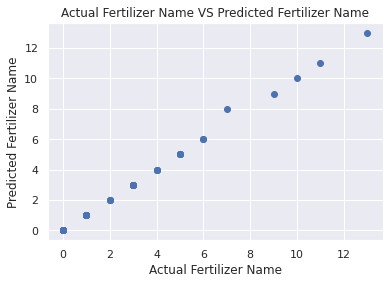

In [325]:
plt.scatter(Y_test, log_reg_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

GaussianNB

In [313]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [314]:
gnb_pred = gnb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print(classification_report(Y_test,gnb_pred))

Accuracy Score :  92.10526315789474 

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.92        38
   macro avg       0.68      0.69      0.68        38
weighted avg       0.88      0.92      0.90        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [330]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  0.6578947368421053
Mean_squared_error:  7.657894736842105
Root mean_squared_error:  2.767290143234371


Checking Actual Fertilizer Name and Predicted Fertilizer Name

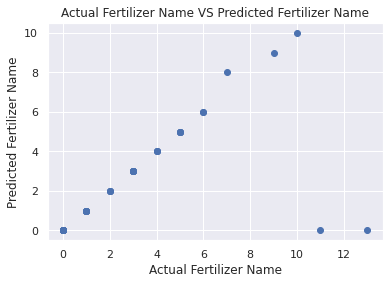

In [326]:
plt.scatter(Y_test, gnb_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

KNeighborsClassifier

In [315]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [316]:
knn_pred = knn.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print(classification_report(Y_test,knn_pred))

Accuracy Score :  84.21052631578947 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         6
           4       1.00      0.33      0.50         3
           5       0.80      1.00      0.89         4
           6       0.33      0.50      0.40         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.84        38
   macro avg       0.59      0.60      0.58        38
weighted avg       0.83      0.84      0.82        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [329]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  0.631578947368421
Mean_squared_error:  4.0
Root mean_squared_error:  2.0


Checking Actual Fertilizer Name and Predicted Fertilizer Name

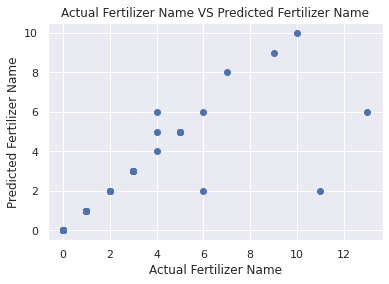

In [327]:
plt.scatter(Y_test, knn_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()

Support Vector Clustering (SVC)

In [317]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [318]:
svc_pred = svc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print(classification_report(Y_test,svc_pred))

Accuracy Score :  60.526315789473685 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.60      1.00      0.75         6
           2       0.00      0.00      0.00         3
           3       0.50      1.00      0.67         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.61        38
   macro avg       0.32      0.38      0.34        38
weighted avg       0.46      0.61      0.51        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control 

In [328]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  1.1842105263157894
Mean_squared_error:  7.342105263157895
Root mean_squared_error:  2.7096319423785022


Checking Actual Fertilizer Name and Predicted Fertilizer Name

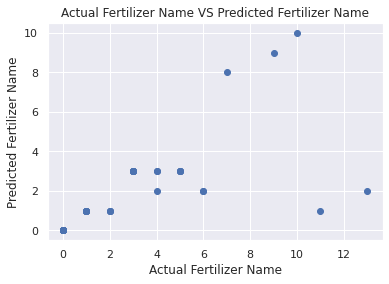

In [321]:
plt.scatter(Y_test, svc_pred)
plt.xlabel('Actual Fertilizer Name')
plt.ylabel('Predicted Fertilizer Name')
plt.title('Actual Fertilizer Name VS Predicted Fertilizer Name')
plt.show()